In [1]:




import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import keras 
from keras.models import Sequential
from keras.layers import Dense 
import tensorflow
#from tensorflow.keras.utils import to_categorical
from keras import layers
#from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K
from keras.utils import np_utils

from tensorflow.keras.models import load_model

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 4051-E7E7

 Directory of C:\Users\Nikhiel\Desktop\Total_batch\NET1

2022/11/25  08:15    <DIR>          .
2022/11/25  08:08    <DIR>          ..
2022/11/25  08:13    <DIR>          .ipynb_checkpoints
2022/11/24  09:38         4ÿ317ÿ453 cnet1_res.txt
2022/11/24  09:39            42ÿ208 cnn1.h5
2022/11/24  09:39             5ÿ544 cnn1.py
2022/11/24  09:38             5ÿ796 cnn1_history.csv
2022/11/24  10:37           652ÿ233 cnn1_viz.html
2022/11/24  10:38            69ÿ462 cnn1_viz.ipynb
2022/11/25  08:15               588 predictions_analysis.ipynb
2022/11/22  00:06        21ÿ624ÿ058 test.csv
               8 File(s)     26ÿ717ÿ342 bytes
               3 Dir(s)  290ÿ054ÿ496ÿ256 bytes free


In [15]:
test = pd.read_csv("test.csv")

In [16]:
len(test)

80268

In [17]:
test.head()

,AN00,AN01,AN02,AN03,AN04,AN05,AN06,AN07,AN08,AN09,...,BN21,BN22,BN23,BN24,BN25,BN26,BN27,BN28,BN29,label
0,10,8,10,11,10,10,20,63,68,42,...,15,15,14,13,13,13,12,12,12,0
1,89,122,65,40,30,26,23,22,19,18,...,14,13,11,11,12,11,14,11,11,0
2,11,12,10,13,12,13,12,12,14,15,...,10,11,9,11,8,9,13,10,10,0
3,30,46,29,22,19,20,38,50,39,37,...,11,9,8,11,9,7,10,9,9,0
4,16,20,16,15,12,12,12,11,11,11,...,31,29,25,28,37,34,30,25,32,1


### Get the labels ohe and separate the signals 

In [65]:
signals = np.array(test.iloc[:, :90]).reshape(len(test), 3, 30)
labels = np.array(test.label)

In [66]:
labels_ohe = keras.utils.np_utils.to_categorical(labels, 2)

In [67]:
labels

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [68]:
labels_ohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [69]:
## Normalize the signals 
sigs_norm = signals/1023


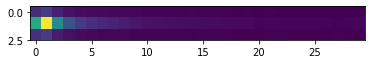

In [70]:
plt.imshow(signals[1])

## Load the keras model 

In [24]:
model = load_model('cnn1.h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convol2D (Conv2D)           (None, 3, 30, 32)         320       
                                                                 
 maxpool (MaxPooling2D)      (None, 1, 10, 32)         0         
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 Dense-output (Dense)        (None, 2)                 642       
                                                                 
Total params: 962
Trainable params: 962
Non-trainable params: 0
_________________________________________________________________


In [71]:
### predict on data 

probs = model.predict(sigs_norm)


In [72]:
preds = np.argmax(probs, axis=1)

In [73]:
preds

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

### confusion matrix

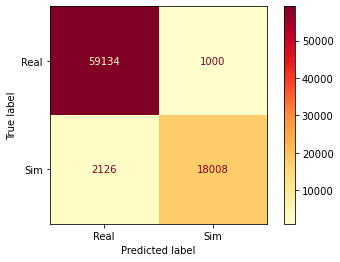

In [74]:
from sklearn import metrics
confusion_mat = metrics.confusion_matrix(labels, preds, labels=[0, 1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ["Real", "Sim"])

cm_display.plot(cmap='YlOrRd')
plt.show() 

In [75]:
Precision = metrics.precision_score(labels, preds, pos_label=1)
Sensitivity_recall = metrics.recall_score(labels, preds, pos_label=1)
Specificity = metrics.recall_score(labels, preds, pos_label=1)
F1_score = metrics.f1_score(labels, preds, pos_label=1)
Accuracy = metrics.accuracy_score(labels, preds)

In [76]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9610554641949469, 'Precision': 0.9473905723905723, 'Sensitivity_recall': 0.8944074699513261, 'Specificity': 0.8944074699513261, 'F1_score': 0.9201369373051964}


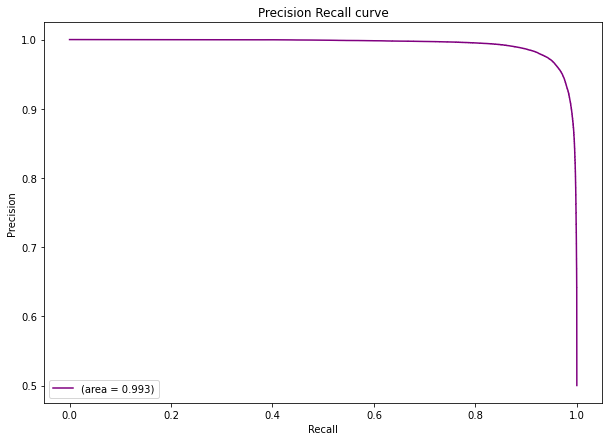

In [130]:
from sklearn.metrics import precision_recall_curve, auc

prec, rec, thres = precision_recall_curve(labels_ohe.ravel(), probs.ravel())
pr_auc=auc(rec, prec)

plt.figure(figsize=(10, 7))
plt.plot(rec, prec, label='(area = {:.3f})'.format(pr_auc), color='purple')
#plt.axhline(0.25, color='red', linestyle='--')
plt.title("Precision Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

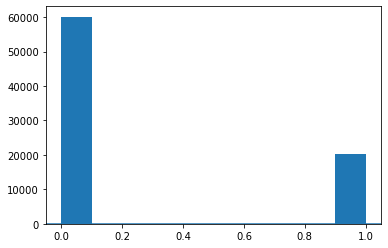

In [78]:
plt.hist(labels)
plt.axhline(0.25)

(array([60134.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20134.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

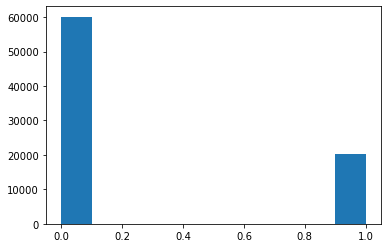

In [79]:
plt.hist(labels)

In [47]:
20134/len(test)

0.25083470374246275

### Lets investigate the signals that were incorrectly predicted 

In [80]:
mis = np.where(labels!=preds)
mis

(array([   46,    52,    75, ..., 80129, 80196, 80216], dtype=int64),)

In [81]:
labels[46]

1

In [82]:
preds[46]

0

In [92]:
probs[46]

array([0.5004047 , 0.49959528], dtype=float32)

In [109]:
mis[0][9:16]

array([200, 274, 279, 282, 290, 296, 300], dtype=int64)

In [103]:
probs[46][0]

0.5004047

In [83]:
import seaborn as sns 

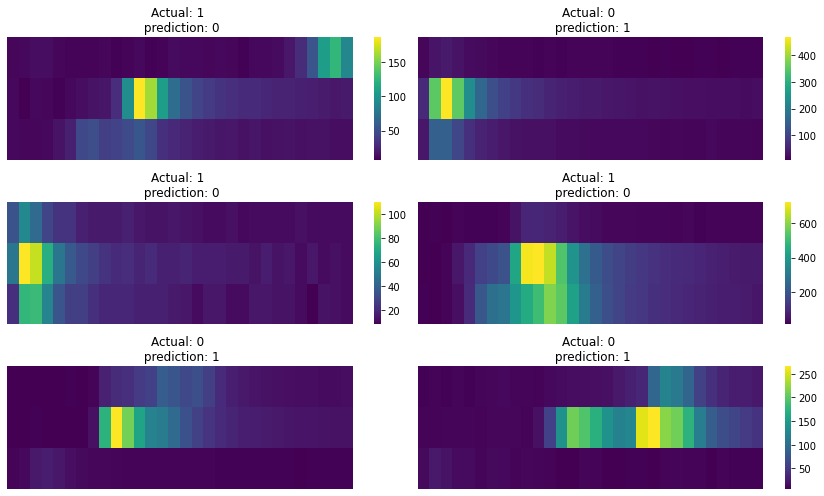

In [108]:

plt.figure(figsize=(12, 7))
plt.subplot(3,2,1)
sns.heatmap(signals[46], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[46], preds[46]))
plt.tight_layout()


plt.subplot(3,2,2)
sns.heatmap(signals[52], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[52], preds[52]))
plt.tight_layout()



plt.subplot(3,2,3)
sns.heatmap(signals[75], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[75], preds[75]))
plt.tight_layout()


plt.subplot(3,2,4)
sns.heatmap(signals[83], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[83], preds[83]))
plt.tight_layout()


plt.subplot(3,2,5)
sns.heatmap(signals[124], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[124], preds[124]))
plt.tight_layout()


plt.subplot(3,2,6)
sns.heatmap(signals[130], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[130], preds[130]))
plt.tight_layout()



In [110]:
mis[0][9:16]

array([200, 274, 279, 282, 290, 296, 300], dtype=int64)

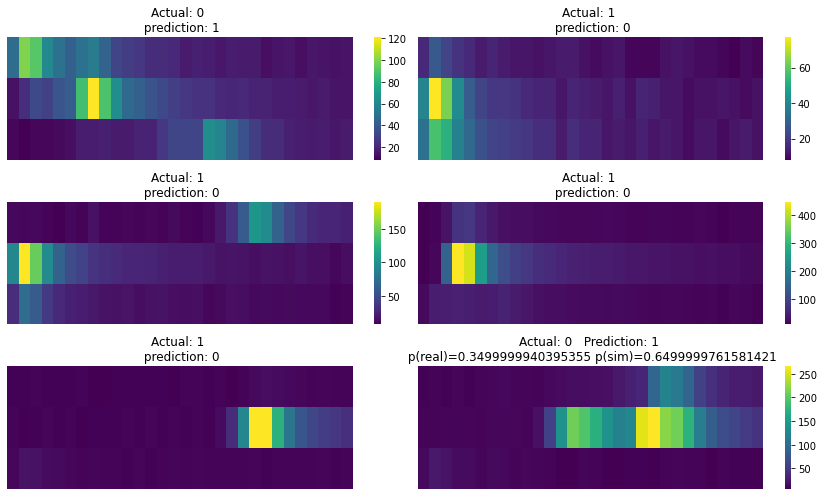

In [129]:
plt.figure(figsize=(12, 7))
plt.subplot(3,2,1)
sns.heatmap(signals[200], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[200], preds[200]))
plt.tight_layout()


plt.subplot(3,2,2)
sns.heatmap(signals[274], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[274], preds[274]))
plt.tight_layout()



plt.subplot(3,2,3)
sns.heatmap(signals[279], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[279], preds[279]))
plt.tight_layout()


plt.subplot(3,2,4)
sns.heatmap(signals[282], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[282], preds[282]))
plt.tight_layout()


plt.subplot(3,2,5)
sns.heatmap(signals[290], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {} \n prediction: {}".format(labels[290], preds[290]))
plt.tight_layout()


plt.subplot(3,2,6)
sns.heatmap(signals[130], cmap='viridis', yticklabels=[], xticklabels=[])
plt.title("Actual: {}   Prediction: {} \n p(real)={} p(sim)={}".format(labels[130], preds[130], 
                                                                               np.round(probs[130][0],2), np.round(probs[130][1],2)))
plt.tight_layout()


In [127]:
np.round(probs[46], 1)

array([0.500405, 0.499595], dtype=float32)